(50, 496, 496)


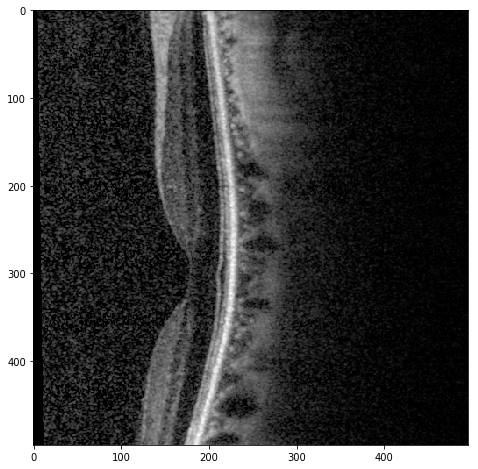

416.89942938659055
0.0


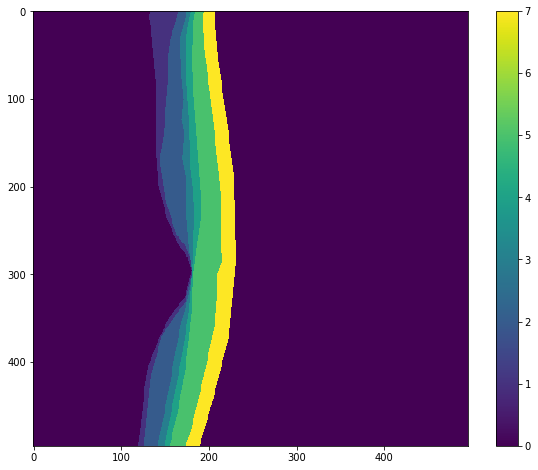

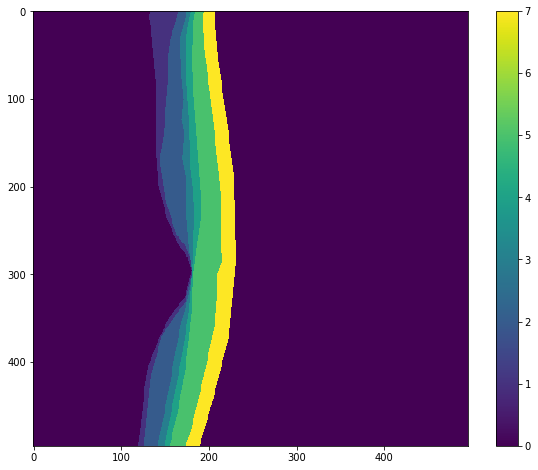

In [45]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'


data = loadmat('datasets/S1_OCTdataset.mat')
oct = data['volumedata']
annotations = data['O1']

oct = np.transpose(oct, (2, 1, 0))
oct = oct[:, 61+16:573, :]
print(oct.shape)
plt.imshow(oct[0], cmap='gray')
plt.show()

annotations = np.transpose(annotations, (2, 1, 0))
annotations = annotations[:, 61 + 16:573, :]

print(np.max(annotations))
print(np.min(annotations))
a = annotations[0].astype(np.int)

ss = np.ones((496, 496))
ss[:, :] = 0
last = list()
for i in range(496):
    last.append(0)
    

for c in range(0, 9):
    for i in range(496):
        if a[i, c] == 0:
            continue
        ss[i, last[i]:a[i, c]] = c
        last[i] = a[i, c]
    
plt.imshow(ss)
plt.colorbar()
plt.show()

label = ss
label_bin = np.zeros((label.shape[0], label.shape[1], 9), dtype=np.int32)
i, j = np.mgrid[0:label.shape[0], 0:label.shape[1]]

label_bin[i, j, label.astype(np.int)] = 1


label = np.argmax(label_bin, axis=-1)
plt.imshow(label)
plt.colorbar()
plt.show()
